There is a great divide between science and media that is blurring our understand of the Covid-19 situation. As the newest members of the Data4Good organization, your role will be to extract information from a lare database and generate insights.

The first part of this project will involve importing data from a github repo and converting it to a sqlite database. You will be given a list of questions that will need to be answered by combining SQL (to extract information), Matplotlib/seaborn (for visualization), and your glorious brains (for interpreting your findings)!


Before:

- Import csv data from [owid data](https://github.com/owid/covid-19-data/tree/master/public/data)

- Convert data to sqlite

**Answer the questions:**

1. How many countries are included in our data set?

2. When was the most recent entry?

3. What country had the highest single day deaths per million? 

4. Select any country. How many times have the deaths per million exceeded 1,000 in one day? 

5. Extract the deaths per million for US, France, and India. Plot the time series data and compare results to what the media is currently saying

6. Plot the deaths per million and cases per million by continent for your birthday in 2020. What does the data say?

7. Plot the lockdown stringency for each country and color the scatter points by continent. Any insights?

BONUS Task:

Plot deaths per million for one country. Find Google's mobility for that country.   
Determine if lockdowns for that country have influenced deaths per million (changed the shape of the curve).   
Remember, you have have to create a lagged variable to account for time from infection to death (median time ~ 15 days).   
Therefore, any change in policy ("lockdown") would take ~15 days to see an effect.

Plot cases per million for a given country.   
Look up when masks became mandatory in that country.   
Did this implementation of this anti-social and anti-science intervention change the shape of the curve. (Meaning was their a sharp change in case numbers?)



### Import libraries

In [1]:
import pandas as pd
import sqlite3

## Import data from github

In [2]:
## download the data from the link

#!wget -q -O 'owid-covid-data.csv' https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv


## Convert data to sqlite

In [3]:
#!pip install csv-to-sqlite
import csv_to_sqlite 

In [4]:
#all the usual options are supported
name_sqlite_db = "owid-covid.sqlite"
options = csv_to_sqlite.CsvOptions(typing_style="full") 
input_files = ["owid-covid-data.csv"] # pass in a list of CSV files
csv_to_sqlite.write_csv(input_files, name_sqlite_db, options)

Error on table owid-covid-data.csv: 
 table [owid-covid-data] already exists
Written 0 rows into 1 tables in 0.653 seconds


0

## Connect to sqlite data base

In [5]:
connection = sqlite3.connect(name_sqlite_db)

In [6]:
cursor = connection.cursor()

In [7]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

#store all names of the tables/chemas in var tables
tables = cursor.fetchall()

tables = list(tables[0])
tables[0]

'owid-covid-data'

In [8]:
full_db = pd.read_sql_query(f"SELECT * FROM 'owid-covid-data'", connection)
full_db

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,,,,,...,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,,,,,...,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,,,,,...,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,,,,,...,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,,,,,...,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86413,ZWE,Africa,Zimbabwe,2021-05-02,38281.0,21.0,27.857,1570.0,2.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86414,ZWE,Africa,Zimbabwe,2021-05-03,38293.0,12.0,27.286,1573.0,3.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86415,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86416,ZWE,Africa,Zimbabwe,2021-05-05,38357.0,30.0,23.714,1574.0,0.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [9]:
full_db.info

<bound method DataFrame.info of       iso_code continent     location        date total_cases new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24         1.0       1.0   
1          AFG      Asia  Afghanistan  2020-02-25         1.0       0.0   
2          AFG      Asia  Afghanistan  2020-02-26         1.0       0.0   
3          AFG      Asia  Afghanistan  2020-02-27         1.0       0.0   
4          AFG      Asia  Afghanistan  2020-02-28         1.0       0.0   
...        ...       ...          ...         ...         ...       ...   
86413      ZWE    Africa     Zimbabwe  2021-05-02     38281.0      21.0   
86414      ZWE    Africa     Zimbabwe  2021-05-03     38293.0      12.0   
86415      ZWE    Africa     Zimbabwe  2021-05-04     38327.0      34.0   
86416      ZWE    Africa     Zimbabwe  2021-05-05     38357.0      30.0   
86417      ZWE    Africa     Zimbabwe  2021-05-06     38398.0      41.0   

      new_cases_smoothed total_deaths new_deaths new_deaths_smoothe

## Answer the questions

### How many countries are included in our data set?

In [10]:
df = pd.read_sql_query(f"SELECT COUNT(DISTINCT location) as 'Number of countries' FROM 'owid-covid-data';", connection)
df

    

,Number of countries
0,219


### When was the most recent entry?

In [11]:
df = pd.read_sql_query(f"SELECT  MAX(date) as 'The most recent entry' FROM 'owid-covid-data';", connection)
df

,The most recent entry
0,2021-05-06


In [12]:
full_db.sort_values('date', ascending=False).head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
86417,ZWE,Africa,Zimbabwe,2021-05-06,38398.0,41.0,23.286,1575.0,1.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
9825,BTN,Asia,Bhutan,2021-05-06,1161.0,17.0,13.571,1.0,0.0,0.0,...,8708.597,1.5,217.066,9.75,,,79.807,1.7,71.78,0.654
55625,NZL,Oceania,New Zealand,2021-05-06,2634.0,1.0,3.0,26.0,0.0,0.0,...,36085.843,,128.797,8.08,14.8,17.2,,2.61,82.29,0.931
24088,SLV,North America,El Salvador,2021-05-06,69997.0,0.0,114.143,2143.0,2.0,3.286,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.65,1.3,73.32,0.673
35091,HUN,Europe,Hungary,2021-05-06,787647.0,1680.0,1523.429,28297.0,124.0,134.143,...,26777.561,0.5,278.296,7.55,26.8,34.8,,7.02,76.88,0.854


### What country had the highest single day deaths per million?

In [13]:
df = pd.read_sql_query(f"SELECT location FROM 'owid-covid-data' order by new_deaths_per_million DESC LIMIT 1;", connection)
df

,location
0,Austria


### Select any country. How many times have the deaths per million exceeded 1,000 in one day?

In [14]:
df = pd.read_sql_query(f"SELECT COUNT(*) new_deaths_per_million FROM 'owid-covid-data' WHERE location = 'Russia' and new_deaths_per_million > 3.2;", connection)
df

,new_deaths_per_million
0,69


### Extract the deaths per million for US, France, and India. 

Plot the time series data and compare results to what the media is currently saying?

In [15]:

death_per_mil = pd.read_sql_query(f"SELECT location, date, new_deaths_per_million FROM 'owid-covid-data' WHERE location = 'United States' OR location = 'France' OR location = 'India';", connection)
death_per_mil.describe()

,location,date,new_deaths_per_million
count,1403,1403,1403
unique,3,471,940
top,United States,2020-08-04,
freq,471,3,101


In [16]:
death_per_mil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   location                1403 non-null   object
 1   date                    1403 non-null   object
 2   new_deaths_per_million  1403 non-null   object
dtypes: object(3)
memory usage: 33.0+ KB


In [17]:
#death_per_mil.fillna(0, inplace = True)
death_per_mil.new_deaths_per_million.replace([' ',''], 0, inplace= True)

death_per_mil['date']= pd.to_datetime(death_per_mil['date'])

In [18]:
death_per_mil.new_deaths_per_million = death_per_mil.new_deaths_per_million.astype(float)

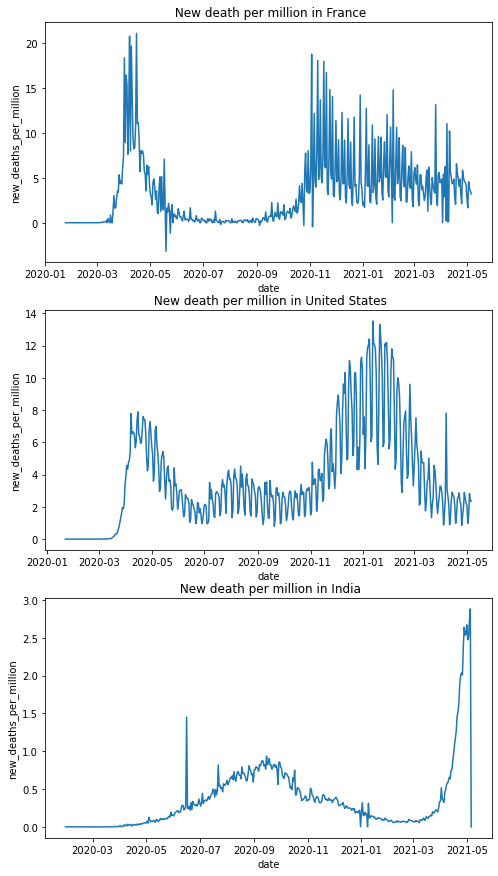

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['France', 'United States', 'India']

fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(8, 15))

for i, country in enumerate(countries):
    df = death_per_mil[death_per_mil.location == country]
    sns.lineplot(data=df, x='date', y='new_deaths_per_million', ax = axes[i])
    axes[i].set_title(f" New death per million in {country}")

### Plot the deaths per million and cases per million by continent for your birthday in 2020. 

What does the data say?

In [20]:
continents2 = pd.read_sql_query("SELECT location, total_cases_per_million, total_deaths_per_million FROM 'owid-covid-data' WHERE date = '2020-08-19' and continent = '';", connection)
continents2 = continents2[continents2.location != "International"]
continents2
#continents2 = continents2.total_case_per_million.astype(float)

,location,total_cases_per_million,total_deaths_per_million
0,Africa,856.079,19.872
1,Asia,1282.255,26.95
2,Europe,4385.028,273.268
3,European Union,3794.944,311.493
5,North America,11072.41,421.8
6,Oceania,615.425,11.458
7,South America,12707.633,421.611
8,World,2878.419,101.11


In [21]:
continents2['total_cases_per_million'] = continents2['total_cases_per_million'].astype(float)
continents2['total_deaths_per_million'] = continents2['total_deaths_per_million'].astype(float)

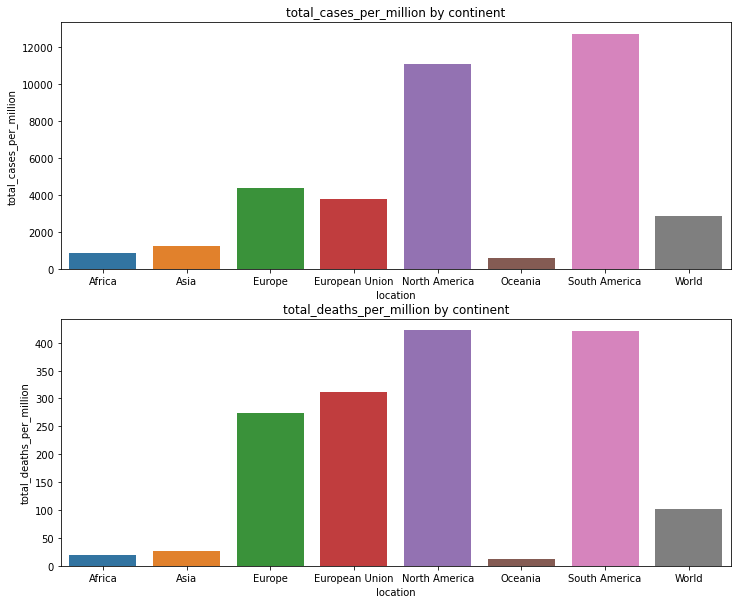

In [22]:
features = ['total_cases_per_million', 'total_deaths_per_million']

fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(12, 10))

for i, feature in enumerate(features):
    sns.barplot(data=continents2, x='location', y=feature, ax = axes[i])
    axes[i].set_title(f"{feature} by continent")

### Plot the lockdown stringency for each country and color the scatter points by continent. Any insights?

In [83]:
df = pd.read_sql_query(f"SELECT continent, location, new_cases_per_million, stringency_index FROM 'owid-covid-data' WHERE continent != '';", connection)
df

,continent,location,new_cases_per_million,stringency_index
0,Asia,Afghanistan,0.026,8.33
1,Asia,Afghanistan,0.0,8.33
2,Asia,Afghanistan,0.0,8.33
3,Asia,Afghanistan,0.0,8.33
4,Asia,Afghanistan,0.0,8.33
...,...,...,...,...
82248,Africa,Zimbabwe,1.413,
82249,Africa,Zimbabwe,0.807,
82250,Africa,Zimbabwe,2.288,
82251,Africa,Zimbabwe,2.018,


In [85]:
df  = df[df.stringency_index != '']
df.new_cases_per_million.replace([' ',''], 0, inplace= True)
df.new_cases_per_million = df.new_cases_per_million.astype(float)

In [86]:
df.stringency_index = df.stringency_index.astype(float)

In [87]:
df = df[df.new_cases_per_million>0]

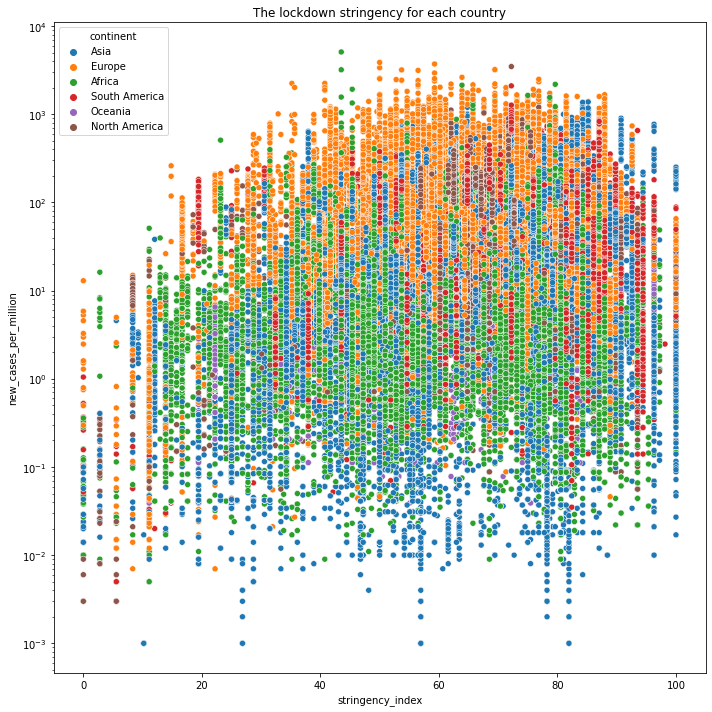

In [89]:
import numpy as np

fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(y = 'new_cases_per_million', x='stringency_index', data=df, hue = 'continent')
ax.set_yscale('log')
ax.set_title(f"The lockdown stringency for each country")


plt.tight_layout()

## Bonus

### Q1
Plot deaths per million for one country. Find Google's mobility for that country.   
Determine if lockdowns for that country have influenced deaths per million (changed the shape of the curve).   
Remember, you have have to create a lagged variable to account for time from infection to death (median time ~ 15 days).   
Therefore, any change in policy ("lockdown") would take ~15 days to see an effect.

In [28]:
mobility = pd.read_csv('Global_Mobility_Report.csv')

/home/smirnova/apps/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248420 entries, 0 to 5248419
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

In [30]:
poland = mobility[mobility.country_region == "Poland"]

In [31]:
poland.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [32]:
poland = poland.drop(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code','place_id'], axis = 1)

In [105]:
poland.date = pd.to_datetime(poland.date)
poland.date

3171477   2020-02-15
3171478   2020-02-16
3171479   2020-02-17
3171480   2020-02-18
3171481   2020-02-19
             ...    
3340734   2021-04-29
3340735   2021-04-30
3340736   2021-05-01
3340737   2021-05-02
3340738   2021-05-03
Name: date, Length: 169262, dtype: datetime64[ns]

In [90]:
features = poland.columns[1:]

In [98]:
poland['mob_sum']= poland['retail_and_recreation_percent_change_from_baseline']+poland['grocery_and_pharmacy_percent_change_from_baseline']+poland['parks_percent_change_from_baseline']+poland['transit_stations_percent_change_from_baseline']+poland['workplaces_percent_change_from_baseline']

<AxesSubplot:xlabel='date'>

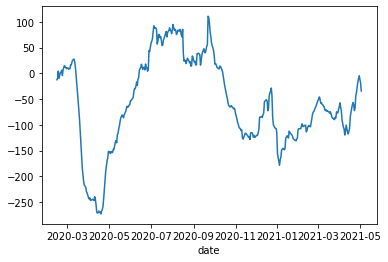

In [101]:
y = poland['mob_sum']
n = 12  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,y)

sns.lineplot(data=poland, x='date', y=yy)

In [110]:
poland['mob_sum_filtred'] = yy

#find date with local minimum
t1 = pd.to_datetime('2020-07-01')
t2 = pd.to_datetime('2020-07-01')
poland[poland.date<pd.to_datetime('2020-07-01')]

Timestamp('2020-02-15 00:00:00')

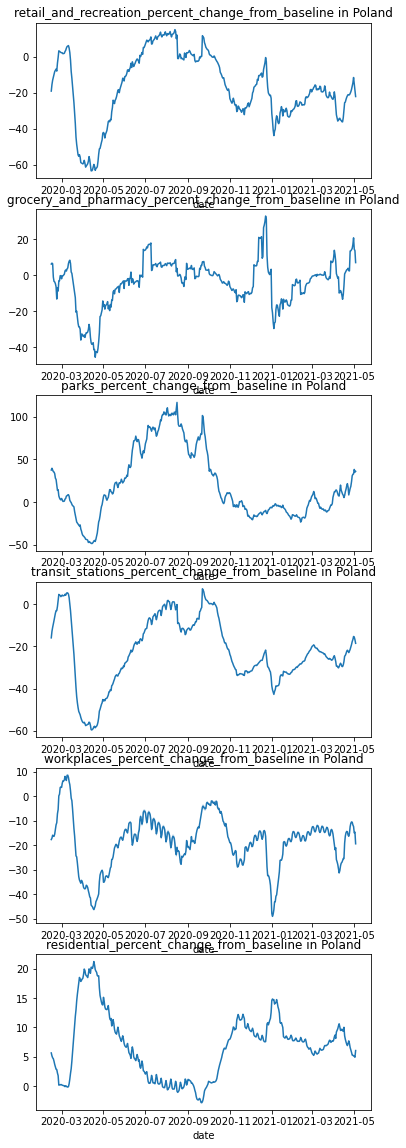

In [104]:
from scipy.signal import lfilter


fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(6, 20))

for i, feature in enumerate(features):
    
    y = poland[feature]
    n = 12  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    yy = lfilter(b,a,y)
    sns.lineplot(data=poland, x='date', y=yy, ax = axes[i])
    axes[i].set_title(f"{feature} in Poland")
    
    

In [49]:
df = pd.read_sql_query(f"SELECT date, new_deaths_per_million FROM 'owid-covid-data' WHERE location = 'Poland';", connection)
df

,date,new_deaths_per_million
0,2020-03-04,
1,2020-03-05,
2,2020-03-06,
3,2020-03-07,
4,2020-03-08,
...,...,...
424,2021-05-02,3.805
425,2021-05-03,0.978
426,2021-05-04,0.74
427,2021-05-05,9.221


In [51]:
df.date = pd.to_datetime(df.date)
df.new_deaths_per_million.replace([' ',''], 0, inplace= True)
df.new_deaths_per_million = df.new_deaths_per_million.astype(float)

Text(0.5, 1.0, 'New deaths per million per day in Poland')

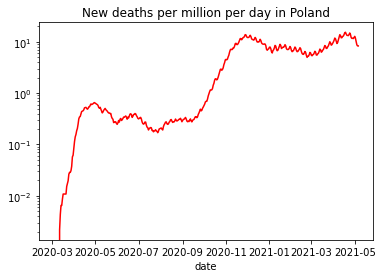

In [75]:
from numpy import median
from scipy.signal import lfilter

y= df.new_deaths_per_million
n = 12  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,y)

sns.lineplot(data=df, x='date', y=yy, color = 'red')
plt.yscale('log')
plt.title('New deaths per million per day in Poland')



### Q2 
Plot cases per million for a given country.   
Look up when masks became mandatory in that country.   
Did this implementation of this anti-social and anti-science intervention change the shape of the curve. (Meaning was their a sharp change in case numbers?)

In [79]:
df = pd.read_sql_query(f"SELECT date, new_cases_per_million FROM 'owid-covid-data' WHERE location = 'Poland';", connection)
df.date = pd.to_datetime(df.date)
df.new_cases_per_million.replace([' ',''], 0, inplace= True)
df.new_cases_per_million = df.new_cases_per_million.astype(float)
df

,date,new_cases_per_million
0,2020-03-04,0.026
1,2020-03-05,0.000
2,2020-03-06,0.106
3,2020-03-07,0.000
4,2020-03-08,0.159
...,...,...
424,2021-05-02,121.966
425,2021-05-03,66.664
426,2021-05-04,60.666
427,2021-05-05,103.021


Text(0.5, 1.0, 'New cases per million per day in Poland')

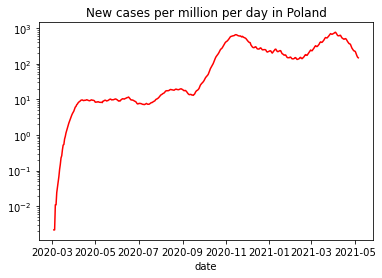

In [82]:
from scipy.signal import lfilter

y= df.new_cases_per_million
n = 12  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,y)

sns.lineplot(data=df, x='date', y=yy, color = 'red')
plt.yscale('log')
plt.title('New cases per million per day in Poland')
